In [76]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [202]:
df = pd.read_csv(filepath_or_buffer='data/time_series_covid19_brasil.csv', sep=',')
df = df.dropna()
df.reset_index()
t = (df.groupby('state')[['confirmed', 'deaths', 'estimated_population_2019']].sum())
t.head(42)

,confirmed,deaths,estimated_population_2019
state,,,
AM,10,5.0,571365.0
CE,796,10.0,8008026.0
DF,242,1.0,3015268.0
GO,3,3.0,624897.0
PE,148,10.0,6582908.0
PI,2,2.0,10692.0
PR,14,4.0,847332.0
RJ,2332,58.0,48161068.0
RS,404,6.0,5935084.0


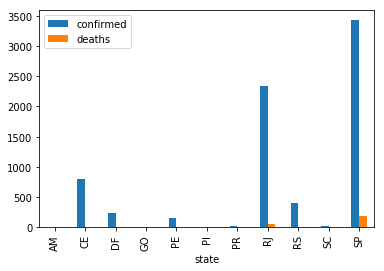

In [203]:
t.drop('estimated_population_2019', axis=1).plot(kind='bar')